# Problem 1

In this problem, we apply Principal Component Analysis to stock market index data.  We will use records of daily closing prices of S&P 500 stocks from January 1, 2011 to December 31, 2014 retrieved through Yahoo Finance. The data is stored in the attached file named “SP500_close_price_no_missing.csv”.  There are actually only 471 stocks in this file, the rest of the stocks were not included either because Yahoo Finance returned an error or because the stock was not listed as of January 1, 2011.  The file named “SP500_ticker.csv” contains ticker information for each included stock, as well as the corresponding company name and its industry sector assignment.  Note: I also included the raw data before missing values are imputed, for those who would like to challenge yourself, you may try to do missing value imputation yourself.

In [189]:
pip install numpy scikit-learn

#### a) Fit a PCA model to log returns  (log return = log( Price [t+1]/Price [t]) derived from stock price data and complete the following tasks

In [190]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file
data = "SP500_close_price_no_missing.csv"
df = pd.read_csv(data, index_col=0)

# Display the first few rows of the data
df.head(3)

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,41.88,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,41.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,41.40,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90


**1. Derive log returns from the raw stock price dataset**

In [191]:
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv")

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Calculate log returns
log_returns = np.log(df.set_index('date') / df.set_index('date').shift(1))

# Drop the first row since it will have NaN for log returns
log_returns = log_returns.dropna()

# Display the first few rows of the data with log returns
print("\nSample of the data with log returns:")
log_returns.head()


Sample of the data with log returns:


,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.026830,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423
2011-01-05,0.000000,-0.003382,0.000000,-0.015596,0.022282,0.015837,0.013402,0.009569,-0.001949,-0.002172,...,-0.003286,0.012819,-0.005935,0.005249,0.003380,0.005427,0.019105,0.004747,0.000737,0.005638
2011-01-06,-0.006134,-0.004365,-0.002074,-0.033434,0.001551,-0.025001,0.017081,0.018557,-0.005514,0.001931,...,-0.014589,0.007264,-0.000851,0.000000,0.016728,-0.000451,0.008831,0.006976,-0.031440,-0.002815
2011-01-07,0.001044,-0.007481,0.004143,0.000747,-0.007153,0.015982,0.000000,0.002179,-0.003931,0.003369,...,-0.003681,0.034794,0.008896,-0.014060,-0.005656,-0.001807,-0.009423,0.012395,-0.000190,-0.010526
2011-01-10,0.010613,-0.013145,-0.008930,0.012429,0.028310,0.039961,-0.001541,0.001864,-0.012975,0.014313,...,-0.008754,-0.000253,-0.006347,0.009687,0.007976,0.000904,-0.017911,0.001413,0.007766,-0.018070



Principal Components:
[[-0.06148286 -0.05612293 -0.01338367 ... -0.0408936  -0.04991073
  -0.05535385]
 [-0.00434789  0.03701181  0.01696748 ...  0.00304186  0.00800357
  -0.03707147]
 [ 0.01596262  0.01254388  0.01556356 ...  0.03623162  0.03169755
   0.01302008]
 ...
 [ 0.09227577 -0.065603   -0.01139293 ...  0.00209021 -0.03506779
   0.09603004]
 [-0.03537103  0.18620536  0.006788   ... -0.01494901  0.00332128
  -0.03571879]
 [ 0.02161292  0.0145303  -0.00429891 ...  0.01294322 -0.01529192
  -0.07746627]]

Explained Variance:
[3.93277492e-01 3.11851527e-02 1.90001588e-02 1.36370708e-02
 9.81370106e-03 8.69826938e-03 7.63752381e-03 6.80333745e-03
 6.40335985e-03 5.77703043e-03 5.55116548e-03 5.36265777e-03
 5.00590626e-03 4.75066111e-03 4.57917744e-03 4.40873720e-03
 4.34108806e-03 4.23233801e-03 4.05724595e-03 3.98461273e-03
 3.87576324e-03 3.81385875e-03 3.71758033e-03 3.67592876e-03
 3.63662290e-03 3.59136930e-03 3.51405451e-03 3.39615392e-03
 3.37029887e-03 3.32940802e-03 3.3091

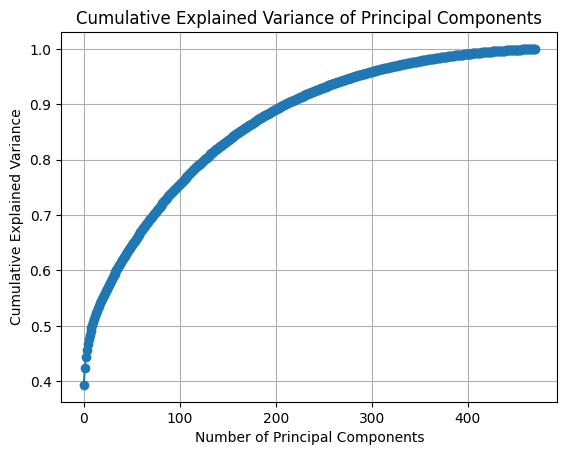

In [192]:
# Standardize the log returns
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Access the principal components and explained variance
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Print results
print("\nPrincipal Components:")
print(principal_components)
print("\nExplained Variance:")
print(explained_variance)

# Plot the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of Principal Components')
plt.grid(True)
plt.show()

**2. Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.**

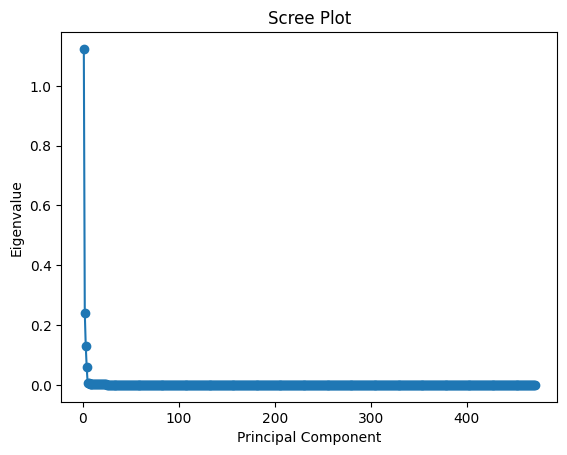

In [193]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on log returns data
pca = PCA()
pca.fit(log_returns.dropna())

# Scree plot
eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

**3. Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction (i.e. the horizontal axis will show the number of components kept, the vertical axis will show the cumulative percentage of variance retained).**

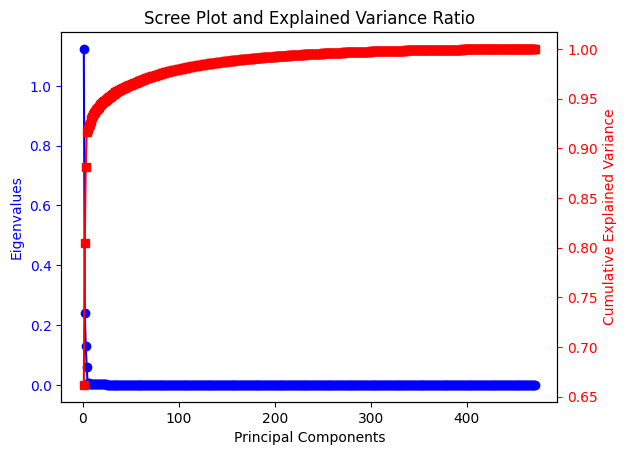

In [194]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot and cumulative explained variance
fig, ax1 = plt.subplots()

# Scree plot
ax1.plot(np.arange(1, len(explained_variance_ratio) + 1), pca.explained_variance_, 'o-', label='Eigenvalues', color='b')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Eigenvalues', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Scree Plot and Explained Variance Ratio')

# Cumulative explained variance plot
ax2 = ax1.twinx()
cumulative_variance_retained = np.cumsum(explained_variance_ratio)
ax2.plot(np.arange(1, len(cumulative_variance_retained) + 1), cumulative_variance_retained,
         's-', label='Cumulative Explained Variance', color='r')
ax2.set_ylabel('Cumulative Explained Variance', color='r')
ax2.tick_params('y', colors='r')

# Show the plot
plt.show()

**4. How many principal components must be retained in order to capture at least 80% of the total variance in data?**

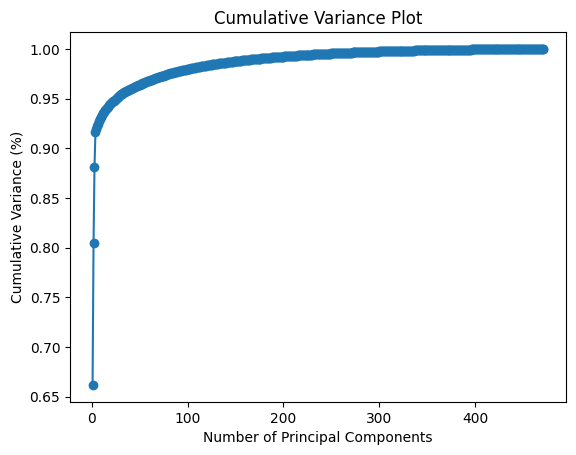

Number of components needed for 80% variance: 2


In [195]:
# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.show()

# Determine the number of principal components needed for 80% variance
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components needed for 80% variance: {n_components_80}")

### b) Analysis of principal components and weights

**1. Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior.**

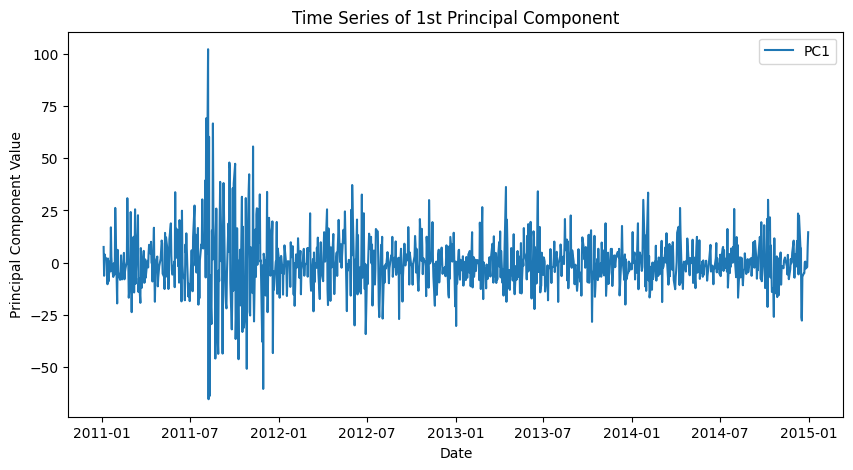

Date with the lowest value for the 1st principal component: 2011-08-09 00:00:00


In [196]:
pca.fit(log_returns_standardized)

# Compute and plot the time series of the 1st principal component
principal_components = pca.transform(log_returns_standardized)
pc1 = principal_components[:, 0]

# Plot time series of the 1st principal component with dates on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(df['date'][1:], pc1, label='PC1')  # Use df['date'][1:] to exclude the first date
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_pc1_index = np.argmin(pc1)
min_pc1_date = df['date'][min_pc1_index + 1]  # Adding 1 to get the correct date
print(f"Date with the lowest value for the 1st principal component: {min_pc1_date}")

**2. Extract the weights from the PCA model for 1st and 2nd principal components.**

In [197]:
# Extract weights from the PCA model for the 1st and 2nd principal components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Print the weights
print("Weights for the 1st principal component:")
print(weights_pc1)
print("\nWeights for the 2nd principal component:")
print(weights_pc2)

Weights for the 1st principal component:
[-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.0544989
 -0.0475701

**3. Create a plot to show weights of the 1st principal component grouped by the industry sector (for example, you may draw a bar plot of mean weight per sector). Observe the distribution of weights (magnitudes, signs). Based on your observation, what kind of information do you think the 1st principal component might have captured?**

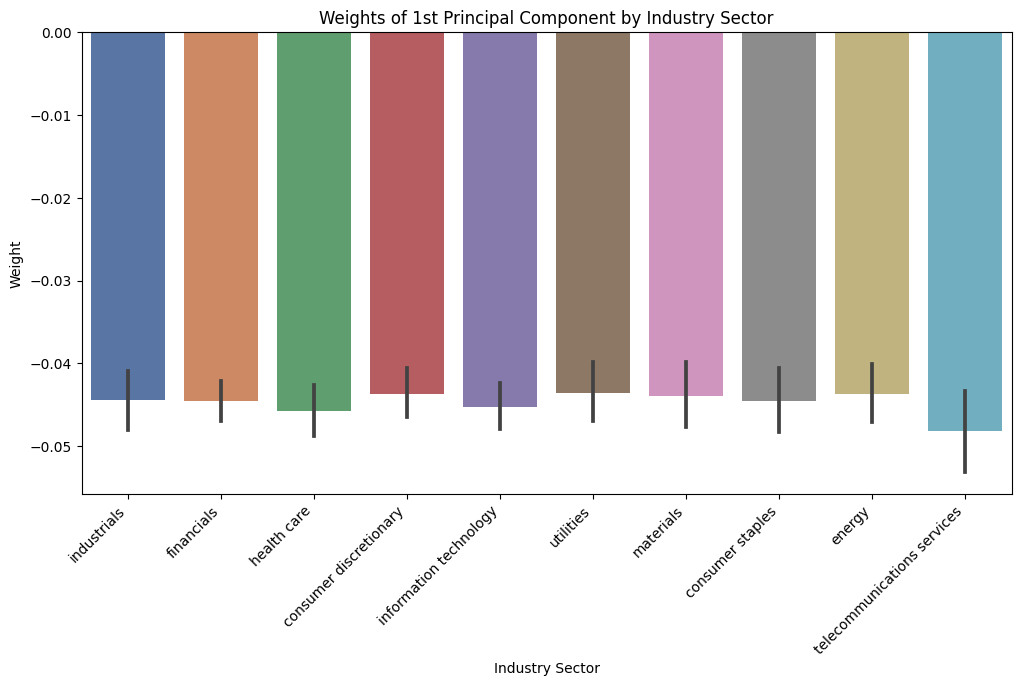

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
ticker_data = pd.read_csv('SP500_ticker.csv', encoding='ISO-8859-1')

# Extract column names from the header row of dataset1 (excluding the first column)
column_names_dataset1 = df.columns[1:].tolist()

# Filter the weights_pc1 based on common tickers
common_weights_pc1 = weights_pc1[df.columns[1:].isin(common_names)]
common_weights_pc1_df = pd.DataFrame(common_weights_pc1, columns=['Weight_PC1'])

# Merge sector data with weights
weights_df = pd.DataFrame({'ticker': df.columns[1:]})
weights_df = pd.concat([weights_df, common_weights_pc1_df], axis=1)

# Merge with ticker_data to get sector information
weights_df = pd.merge(weights_df, ticker_data[['ticker', 'sector']], on='ticker')

# Remove leading and trailing whitespaces and convert sector names to lowercase
weights_df['sector'] = weights_df['sector'].str.lower().str.strip()

# Define a custom color palette
custom_palette = "deep"

# Plot weights for the 1st principal component grouped by industry sector
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='Weight_PC1', data=weights_df, palette=custom_palette)
plt.title('Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Weight')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

**4. Make a similar plot for the 2nd principal component.  What kind of information do you think does this component reveal? (Hint: look at the signs and magnitudes.)**

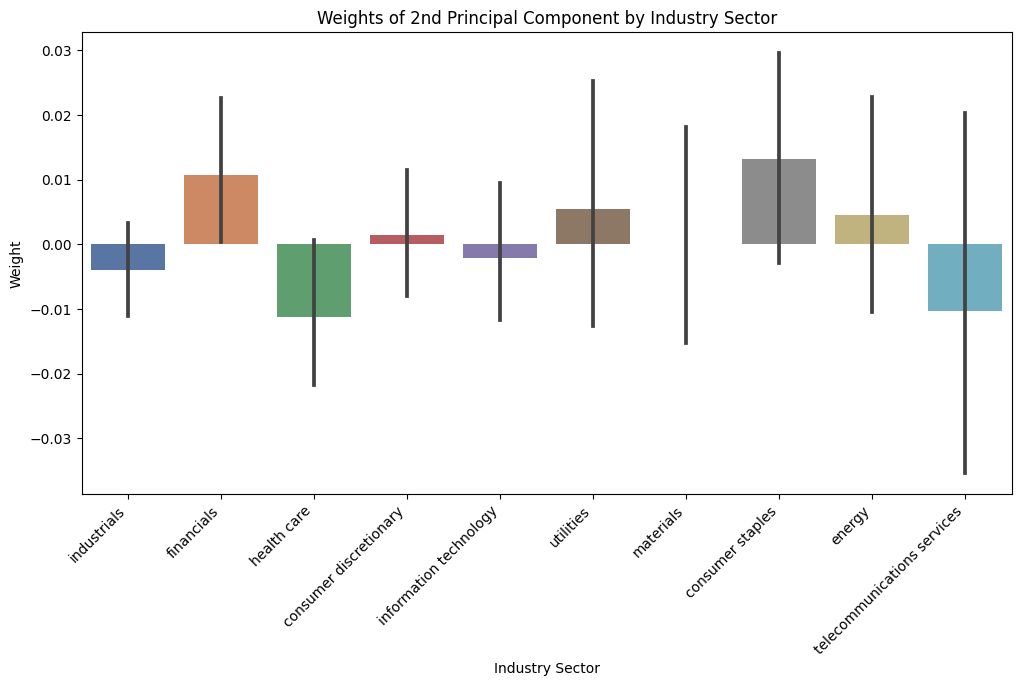

In [199]:
# Filter the weights_pc2 based on common tickers
common_weights_pc2 = weights_pc2[df.columns[1:].isin(common_names)]
common_weights_pc2_df = pd.DataFrame(common_weights_pc2, columns=['Weight_PC2'])

# Merge with ticker_data to get sector information
weights_df_pc2 = pd.DataFrame({'ticker': df.columns[1:]})
weights_df_pc2 = pd.concat([weights_df_pc2, common_weights_pc2_df], axis=1)
weights_df_pc2 = pd.merge(weights_df_pc2, ticker_data[['ticker', 'sector']], on='ticker')

# Remove leading and trailing whitespaces and convert sector names to lowercase
weights_df_pc2['sector'] = weights_df_pc2['sector'].str.lower().str.strip()

# Define a custom color palette
custom_palette = "deep"

# Plot weights for the 2nd principal component grouped by industry sector
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='Weight_PC2', data=weights_df_pc2, palette=custom_palette)
plt.title('Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Weight')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

**5. Suppose we wanted to construct a new stock index using one principal component to track the overall market tendencies. Which of the two components would you prefer to use for this purpose, the 1st or the 2nd? Why?**

### c) Bonus points (20 points)
Re-run the PCA analysis with the most updated data downloaded from the available stock price API.


# Problem 2

Let us experiment with a few feature selection methods. We will use data stored in ‘BMI.csv’ file. This data contains measurements of Body Mass Index (BMI) obtained for a number of human subjects. The goal is to predict fat percentage (fatpctg) using all other features available in data.

**a) Wrapper method: Search for the best set of features using backward and forward stepwise regression**

In [200]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the CSV file
data = pd.read_csv("BMI.csv")

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in data.columns if col != target_variable]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

def backward_stepwise_regression(data, features, target_variable):
    remaining_features = set(features)
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining_features and current_score == best_new_score:
        scores_with_candidates = []

        for candidate in remaining_features:
            model = sm.OLS(data[target_variable], sm.add_constant(data[selected_features + [candidate]])).fit()
            score = model.aic
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()

        if current_score > best_new_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score

    return selected_features

def forward_stepwise_regression(data, features, target_variable):
    remaining_features = set(features)
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining_features and current_score == best_new_score:
        scores_with_candidates = []

        for candidate in remaining_features:
            model = sm.OLS(data[target_variable], sm.add_constant(data[selected_features + [candidate]])).fit()
            score = model.aic
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)

        if current_score > best_new_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score

    return selected_features

# Backward stepwise regression
selected_features_backward = backward_stepwise_regression(train_data, features, target_variable)
print("Selected features (Backward Stepwise Regression):", selected_features_backward)

# Forward stepwise regression
selected_features_forward = forward_stepwise_regression(train_data, features, target_variable)
print("Selected features (Forward Stepwise Regression):", selected_features_forward)


Selected features (Backward Stepwise Regression): ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck']
Selected features (Forward Stepwise Regression): ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck']


**b) Filter method:  output a ranking of features using correlation statistics (i.e. between any of the input variables and output)**

In [201]:
# Define the target variable
target_variable = 'fatpctg'

# Calculate the correlation between each input variable and the target variable
correlation_ranking = data.corr()[target_variable].abs().sort_values(ascending=False)

# Display the ranking
print("Feature Ranking Based on Correlation with", target_variable)
print(correlation_ranking)

Feature Ranking Based on Correlation with fatpctg
fatpctg    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


**c) Embedded method: (1) Lasso regression; (2) random forest (feature importance ranking)**

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in data.columns if col != target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_variable], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients and corresponding feature names
lasso_coefficients = pd.Series(lasso_model.coef_, index=features)

# Display the feature importance ranking from Lasso regression
lasso_ranking = lasso_coefficients.abs().sort_values(ascending=False)
print("Feature Ranking Based on Lasso Regression Coefficients:")
print(lasso_ranking)

Feature Ranking Based on Lasso Regression Coefficients:
Abdomen    8.433105
Wrist      1.896782
Age        0.818081
Neck       0.614401
Weight     0.564124
Biceps     0.531767
Height     0.423096
Forearm    0.175674
Thigh      0.086877
Chest      0.000000
Hip        0.000000
Knee       0.000000
Ankle      0.000000
dtype: float64


In [203]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
random_forest_model.fit(X_train, y_train)

# Get the feature importances
feature_importances = pd.Series(random_forest_model.feature_importances_, index=features)

# Display the feature importance ranking from Random Forest
rf_ranking = feature_importances.sort_values(ascending=False)
print("\nFeature Ranking Based on Random Forest Feature Importances:")
print(rf_ranking)


Feature Ranking Based on Random Forest Feature Importances:
Abdomen    0.714957
Weight     0.031164
Wrist      0.030504
Height     0.029040
Hip        0.028463
Neck       0.026902
Chest      0.024049
Age        0.023840
Ankle      0.019951
Biceps     0.019619
Knee       0.019410
Forearm    0.016606
Thigh      0.015493
dtype: float64
